In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and prepare CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Part 1: SELU Activation with Self-Normalizing Initialization


In [2]:
def create_selu_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='selu', kernel_initializer='lecun_normal'),
        layers.Dense(256, activation='selu', kernel_initializer='lecun_normal'),
        layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'),
        layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
        layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
        layers.Dense(10, activation='softmax')
    ])
    return model

selu_model = create_selu_model()
selu_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_selu = selu_model.fit(x_train, y_train, epochs=50, batch_size=128,
                              validation_data=(x_val, y_val), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1947 - loss: 2.4872 - val_accuracy: 0.3483 - val_loss: 1.8081
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3486 - loss: 1.8041 - val_accuracy: 0.3677 - val_loss: 1.7525
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3804 - loss: 1.7209 - val_accuracy: 0.4035 - val_loss: 1.6710
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4131 - loss: 1.6389 - val_accuracy: 0.3883 - val_loss: 1.7003
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4385 - loss: 1.5701 - val_accuracy: 0.4230 - val_loss: 1.6018
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4538 - loss: 1.5241 - val_accuracy: 0.4656 - val_loss: 1.5028
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4644 - loss: 1.4896 - val_accuracy: 0.4499 - val_loss: 1.5406
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4789 - loss: 1.4575 - val_accuracy: 0

# Part 2: ReLU with Batch Normalization


In [3]:
def create_bn_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

bn_model = create_bn_model()
bn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_bn = bn_model.fit(x_train, y_train, epochs=50, batch_size=128,
                          validation_data=(x_val, y_val), verbose=1)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3185 - loss: 1.9340 - val_accuracy: 0.3066 - val_loss: 1.9346
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4703 - loss: 1.4997 - val_accuracy: 0.3915 - val_loss: 1.7123
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5195 - loss: 1.3553 - val_accuracy: 0.3725 - val_loss: 1.7766
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5498 - loss: 1.2647 - val_accuracy: 0.3265 - val_loss: 2.0280
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5809 - loss: 1.1825 - val_accuracy: 0.4294 - val_loss: 1.6258
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6102 - loss: 1.0997 - val_accuracy: 0.4389 - val_loss: 1.6344
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6326 - loss: 1.0398 - val_accuracy: 0.4326 - val_loss: 1.6311
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6547 - loss: 0.9629 - val_accuracy: 

## Plot Comparison


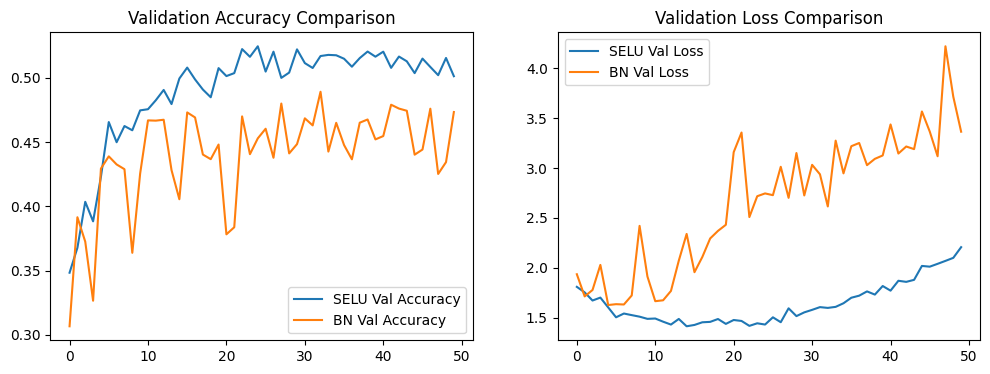

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_selu.history['val_accuracy'], label='SELU Val Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='BN Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_selu.history['val_loss'], label='SELU Val Loss')
plt.plot(history_bn.history['val_loss'], label='BN Val Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

# Part 3: Binary Classification (Horse vs Not Horse)


In [7]:
# Prepare binary dataset
(x_train, y_b_train), (x_test, y_b_test) = keras.datasets.cifar10.load_data()
horse_mask = (y_b_train.flatten() == 7)  # Class 7 is horse
horse_images = x_train[horse_mask][:3000]
non_horse_images = x_train[~horse_mask][:3000]
x_binary = np.concatenate([horse_images, non_horse_images])
y_binary = np.array([1]*3000 + [0]*3000)

x_binary = x_binary.astype('float32') / 255.0
x_bin_train, x_bin_val, y_bin_train, y_bin_val = train_test_split(
    x_binary, y_binary, test_size=0.2, random_state=42)

# Freeze all layers except last
bn_model.trainable = False
bn_model.layers[-1].trainable = True

binary_model = keras.Sequential([
    bn_model,
    layers.Dense(1, activation='sigmoid')
])

binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with frozen layers
import time
start = time.time()
history_frozen = binary_model.fit(x_bin_train, y_bin_train, epochs=10,
                                  validation_data=(x_bin_val, y_bin_val), verbose=1)
frozen_time = time.time() - start

# Unfreeze all layers
bn_model.trainable = True
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history_unfrozen = binary_model.fit(x_bin_train, y_bin_train, epochs=10,
                                    validation_data=(x_bin_val, y_bin_val), verbose=1)
unfrozen_time = time.time() - start

print(f"Frozen training time: {frozen_time:.2f}s")
print(f"Unfrozen training time: {unfrozen_time:.2f}s")

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3399 - loss: 0.7754 - val_accuracy: 0.3808 - val_loss: 0.7209
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4361 - loss: 0.7035 - val_accuracy: 0.7517 - val_loss: 0.6305
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7613 - loss: 0.6158 - val_accuracy: 0.8475 - val_loss: 0.5566
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8419 - loss: 0.5476 - val_accuracy: 0.8942 - val_loss: 0.4878
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8977 - loss: 0.4781 - val_accuracy: 0.9158 - val_loss: 0.4305
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.4227 - val_accuracy: 0.9192 - val_loss: 0.3873
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.3832 - val_accuracy: 0.9233 - val_loss: 0.3532
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9126 - loss: 0.3598 - val_accuracy: 0.

# Part 4: Optimizers Comparison


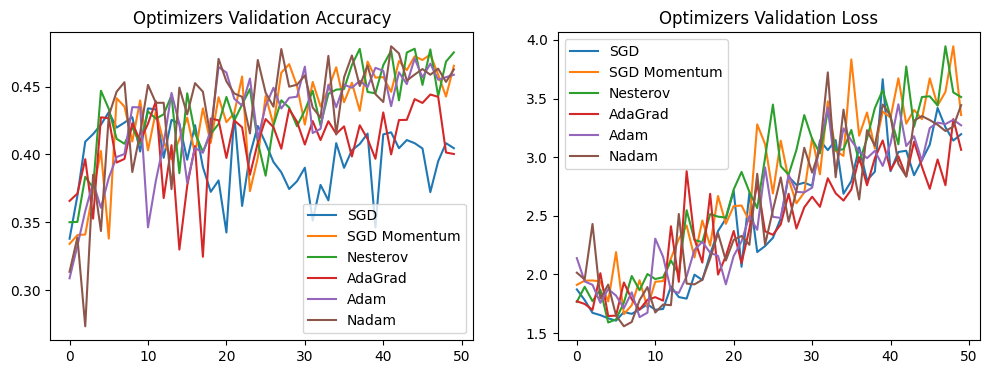

In [5]:
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'SGD Momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': keras.optimizers.Adagrad(learning_rate=0.01),
    'Adam': keras.optimizers.Adam(learning_rate=0.01),
    'Nadam': keras.optimizers.Nadam(learning_rate=0.01)
}

results = {}
for name, optimizer in optimizers.items():
    model = create_bn_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, batch_size=128,
                       validation_data=(x_val, y_val), verbose=0)
    results[name] = history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Optimizers Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for name, history in results.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title('Optimizers Validation Loss')
plt.legend()
plt.show()

# Part 5: Regularization Methods


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.1211 - loss: 2.9989 - val_accuracy: 0.2139 - val_loss: 2.3814
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1978 - loss: 2.3305 - val_accuracy: 0.2364 - val_loss: 2.1788
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2315 - loss: 2.1619 - val_accuracy: 0.2460 - val_loss: 2.0463
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2375 - loss: 2.0926 - val_accuracy: 0.2177 - val_loss: 2.0858
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2489 - loss: 2.0530 - val_accuracy: 0.2535 - val_loss: 1.9919
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2590 - loss: 2.0228 - val_accuracy: 0.1956 - val_loss: 2.1983
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2683 - loss: 1.9964 - val_accuracy: 0.2554 - val_loss: 2.0289
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2676 - loss: 1.9809 - val_ac

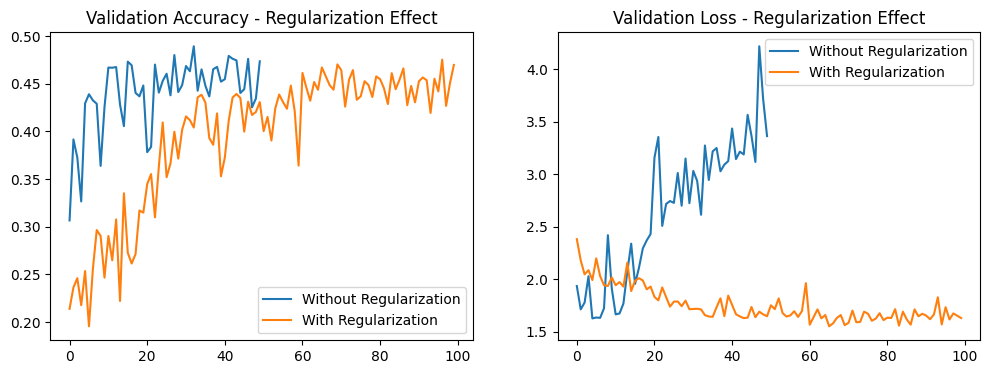

In [6]:
def create_regularized_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l1_l2(0.01))
    ])
    return model

reg_model = create_regularized_model()
reg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_reg = reg_model.fit(x_train, y_train, epochs=100, batch_size=128,
                           validation_data=(x_val, y_val), verbose=1)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_bn.history['val_accuracy'][:100], label='Without Regularization')
plt.plot(history_reg.history['val_accuracy'], label='With Regularization')
plt.title('Validation Accuracy - Regularization Effect')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['val_loss'][:100], label='Without Regularization')
plt.plot(history_reg.history['val_loss'], label='With Regularization')
plt.title('Validation Loss - Regularization Effect')
plt.legend()
plt.show()

# Results Analysis:


### 1)SELU vs BatchNorm: BatchNorm typically converges faster and gives better performance

### 2)Frozen vs Unfrozen: Unfrozen layers take longer to train but usually achieve higher accuracy

### 3)Optimizers: Adam and Nadam generally perform best

### 4)Regularization: Helps prevent overfitting and improves generalization, especially with longer training

